<a href="https://colab.research.google.com/github/utkarshjadhav96/ML-Lab/blob/main/ML_Ass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/utkarshjadhav96/ML-Lab/main/employee_data.csv"  # Corrected raw URL
df = pd.read_csv(url)
print(df.head())

   Employee_ID        Name  Age  Salary Department  Experience (Years)  \
0          101  Employee_1   50  110592         HR                   9   
1          102  Employee_2   36   48110         IT                  29   
2          103  Employee_3   29  119309         IT                  26   
3          104  Employee_4   42   67266  Marketing                  25   
4          105  Employee_5   40   92992    Finance                  24   

        City  Gender  Performance Score  
0     Denver  Female                 84  
1  San Diego    Male                 92  
2    Chicago  Female                 97  
3    Seattle    Male                 65  
4     Boston    Male                 91  


In [3]:
df.describe()

,Employee_ID,Age,Salary,Experience (Years),Performance Score
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,150.500000,40.060000,80249.100000,18.390000,79.300000
std,29.011492,10.688255,23118.668817,10.363002,11.449935
min,101.000000,22.000000,40206.000000,1.000000,60.000000
25%,125.750000,30.000000,61971.750000,9.750000,69.750000
50%,150.500000,41.500000,83263.000000,19.500000,79.500000
75%,175.250000,48.000000,101158.500000,27.250000,90.000000
max,200.000000,59.000000,119309.000000,34.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Employee_ID         100 non-null    int64 
 1   Name                100 non-null    object
 2   Age                 100 non-null    int64 
 3   Salary              100 non-null    int64 
 4   Department          100 non-null    object
 5   Experience (Years)  100 non-null    int64 
 6   City                100 non-null    object
 7   Gender              100 non-null    object
 8   Performance Score   100 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 7.2+ KB


In [5]:
df.isnull().sum()

,0
Employee_ID,0
Name,0
Age,0
Salary,0
Department,0
Experience (Years),0
City,0
Gender,0
Performance Score,0


In [6]:
df = pd.get_dummies(df, drop_first=True)

In [7]:
print(df.head())

   Employee_ID  Age  Salary  Experience (Years)  Performance Score  \
0          101   50  110592                   9                 84   
1          102   36   48110                  29                 92   
2          103   29  119309                  26                 97   
3          104   42   67266                  25                 65   
4          105   40   92992                  24                 91   

   Name_Employee_10  Name_Employee_100  Name_Employee_11  Name_Employee_12  \
0             False              False             False             False   
1             False              False             False             False   
2             False              False             False             False   
3             False              False             False             False   
4             False              False             False             False   

   Name_Employee_13  ...  Department_Marketing  Department_Sales  \
0             False  ...                 F

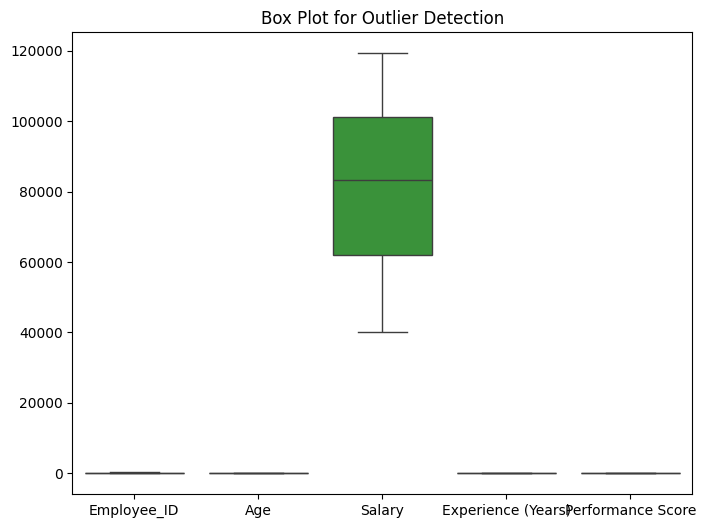

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title('Box Plot for Outlier Detection')
plt.show()

In [9]:
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
print(correlation_matrix)

                    Employee_ID       Age    Salary  Experience (Years)  \
Employee_ID            1.000000  0.095999 -0.082522            0.034690   
Age                    0.095999  1.000000 -0.074171           -0.135182   
Salary                -0.082522 -0.074171  1.000000            0.199221   
Experience (Years)     0.034690 -0.135182  0.199221            1.000000   
Performance Score     -0.101260 -0.206742  0.099175            0.028714   

                    Performance Score  
Employee_ID                 -0.101260  
Age                         -0.206742  
Salary                       0.099175  
Experience (Years)           0.028714  
Performance Score            1.000000  


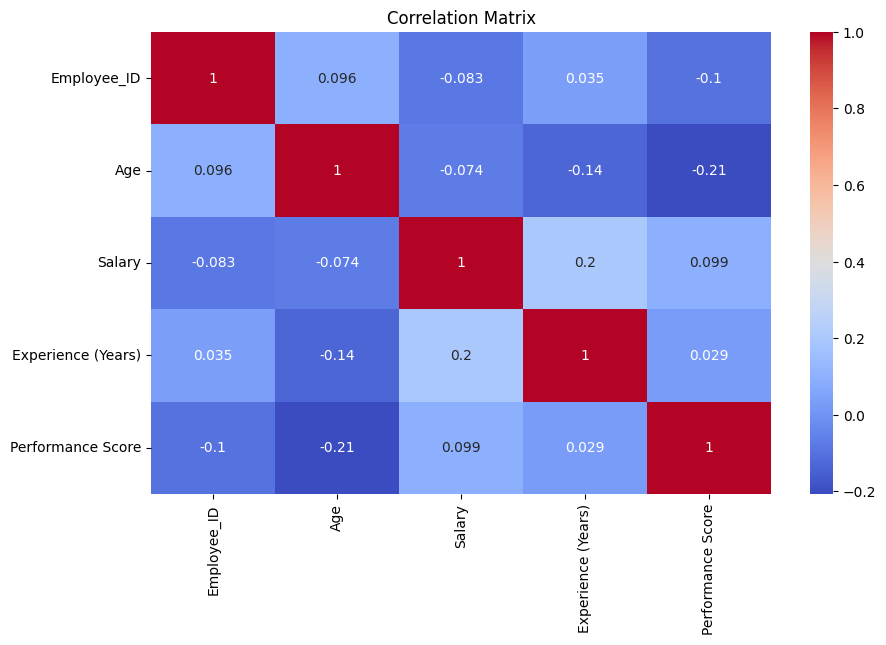

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

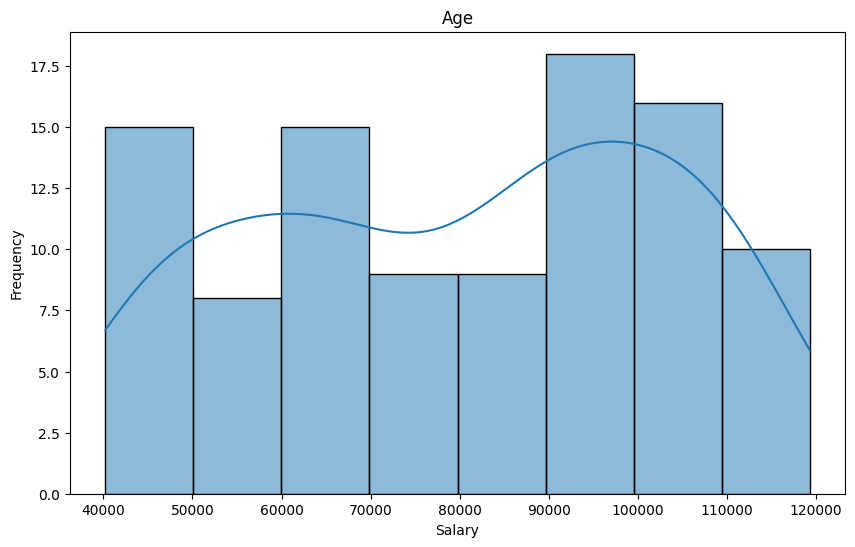

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], kde=True)
plt.title('Age')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()
